In [43]:
import pandas as pd
from mplsoccer import VerticalPitch
from mplsoccer import Pitch

In [7]:
df = pd.read_csv('Liverpool_events.csv')

In [9]:
df.head()

,id,event_id,minute,second,team_id,team_name,player_id,x,y,end_x,end_y,is_touch,is_shot,is_goal,type,outcome,period,name,shirt_no,position
0,2744720053,3,0,0,36,Leverkusen,299684,50.0,50.0,34.2,45.4,True,False,False,Pass,Successful,FirstHalf,Exequiel Palacios,25,MC
1,2744720087,4,0,5,36,Leverkusen,369446,45.9,48.7,40.7,71.4,True,False,False,Pass,Successful,FirstHalf,Edmond Tapsoba,12,DC
2,2744720113,5,0,7,36,Leverkusen,134946,40.7,71.4,42.1,87.3,True,False,False,Pass,Successful,FirstHalf,Jonathan Tah,4,DC
3,2744720151,6,0,9,36,Leverkusen,404832,42.6,88.5,100.0,79.7,True,False,False,Pass,Unsuccessful,FirstHalf,Piero Hincapié,3,DC
4,2744720297,4,0,22,26,Liverpool,95408,5.0,61.1,3.5,49.6,True,False,False,Pass,Successful,FirstHalf,Virgil van Dijk,4,DC


In [11]:
df.type.unique()

array(['Pass', 'Clearance', 'BallRecovery', 'Dispossessed', 'Tackle',
       'Interception', 'TakeOn', 'MissedShots', 'BallTouch', 'SavedShot',
       'Save', 'KeeperPickup', 'Foul', 'BlockedPass', 'Aerial',
       'Challenge', 'Card', 'CornerAwarded', 'Claim', 'KeeperSweeper',
       'Error', 'Goal', 'OffsidePass', 'OffsideProvoked',
       'SubstitutionOff', 'SubstitutionOn'], dtype=object)

In [15]:
df = df[df['type'].isin(['Pass', 'BallTouch', 'Tackle', 'BallRecovery',
'Clearence', 'BlockedPass', 'TakeOn', 'Interception', 'Challenge'])]

In [21]:
#Filtering for team
df_team = df[df['team_id'] == 26]

In [19]:
df.name.unique()

array(['Exequiel Palacios', 'Edmond Tapsoba', 'Jonathan Tah',
       'Piero Hincapié', 'Virgil van Dijk', 'Caoimhín Kelleher',
       'Jeremie Frimpong', 'Kostas Tsimikas', 'Luis Díaz',
       'Alexis Mac Allister', 'Cody Gakpo', 'Florian Wirtz',
       'Trent Alexander-Arnold', 'Curtis Jones', 'Victor Boniface',
       'Ryan Gravenberch', 'Aleix García', 'Lukás Hrádecky',
       'Granit Xhaka', 'Álex Grimaldo', 'Ibrahima Konaté',
       'Mohamed Salah', 'Dominik Szoboszlai', 'Jonas Hofmann',
       'Robert Andrich', 'Patrik Schick', 'Andy Robertson',
       'Darwin Núñez', 'Nathan Tella', 'Conor Bradley', 'Jarell Quansah'],
      dtype=object)

In [60]:
#Filtering for player
df_player = df[df['name'] == 'Mohamed Salah']

Text(0.5, 1.0, 'Liverpool vs Leverkusen')

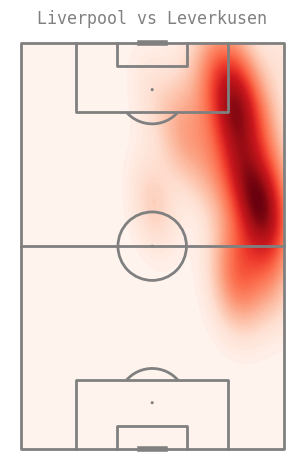

In [63]:
#Plotting

pitch = VerticalPitch(pitch_type='opta', pitch_color='white', line_color='grey', line_zorder=2)

fig, ax = pitch.draw()

# Create a heatmap
# All this is doing is creating a wrapper around seaborn's kdeplot
kde = pitch.kdeplot(
    df_player.x,
    df_player.y,
    fill=True, # This will fill the heatmap with color even if there are no events
    thresh=0,
    n_levels=100, # This adjusts the smoothness of the heatmap. The higher the number, the smoother the heatmap will be
    cut=10,
    cmap='Reds',
    ax=ax
)

# Let's add a title
ax.set_title('Liverpool vs Leverkusen', fontfamily='monospace', c='grey')